# Import and warehouse data:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
print(df_1.shape)


(7043, 10)


In [3]:
df_2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
print(df_2.shape)

(7043, 11)


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OnlineBackup      7043 non-null   object 
 1   DeviceProtection  7043 non-null   object 
 2   TechSupport       7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   object 
 10  Churn             7043 non-null   object 
dtypes: float64(1), object(10)
memory usage: 605.4+ KB


As the df_1 contains 10 colums and df_2 contains 11 colums with no common column,it is not appropriate to just concatenate the data on basis of assumption that the data is alligned similarly and there is no mention of data in the assignment sheet as well. Hence, I have used TelecomCustomer-Churn

In [6]:
df = pd.read_csv('TelcomCustomer-Churn.csv')
print(df.shape)

(7043, 21)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data cleansing

In [8]:
df.isna().sum() # No missing values are found.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
for col in list(df.columns):
    print(pd.value_counts(df[col]))

0804-XBFBV    1
0744-BIKKF    1
6982-SSHFK    1
8399-YNDCH    1
6891-JPYFF    1
             ..
3487-EARAT    1
5494-HECPR    1
1666-JXLKU    1
8865-TNMNX    1
7471-MQPOS    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

Customer Id column is unique for each row and does not have any relevance. Hence dropping the particular column

In [10]:
df=df.drop('customerID',axis=1)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape#Verifying whether the colum customer Id is dropped

(7043, 20)

In [13]:

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels for the object data type columns
counter = 0
column_name=list(df.columns)
Data_Type=list(df.dtypes)
for i in range(len(df.columns)):
        if Data_Type[counter]=="object":
            df.iloc[:, counter]= label_encoder.fit_transform(df.iloc[:, counter])
            counter=counter+1
        else:
             counter=counter+1
            
        
            
        


In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


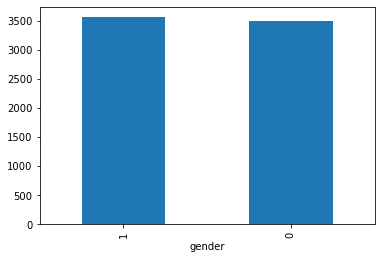

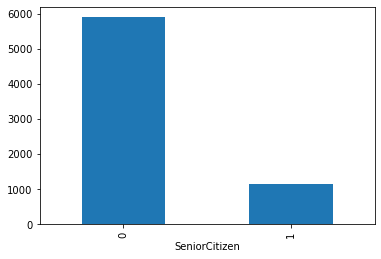

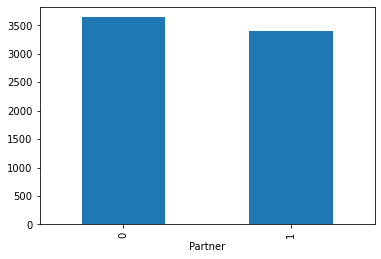

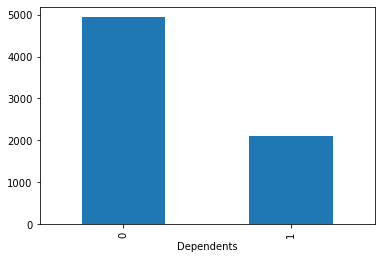

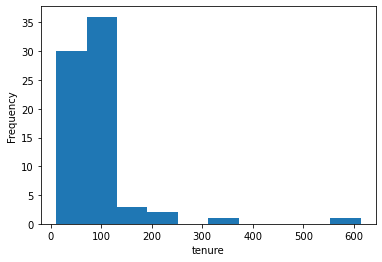

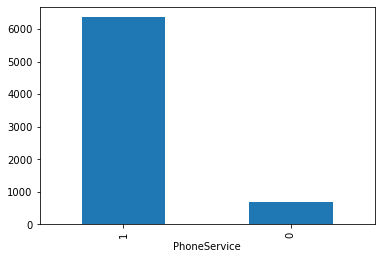

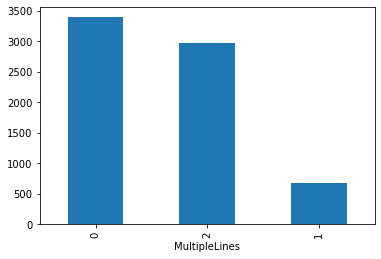

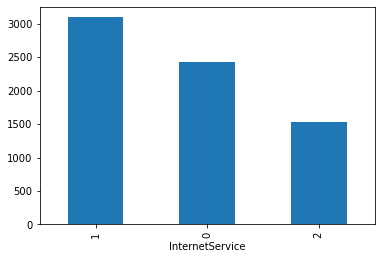

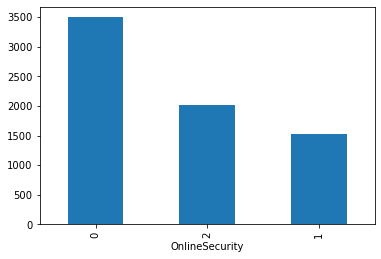

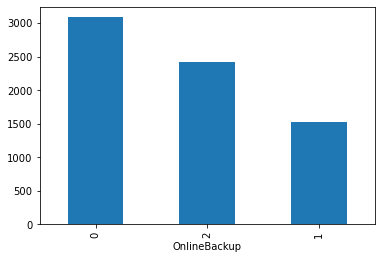

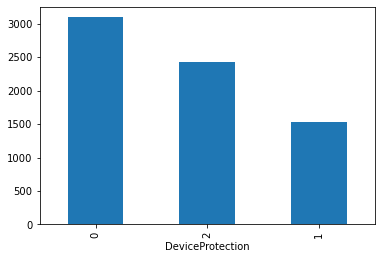

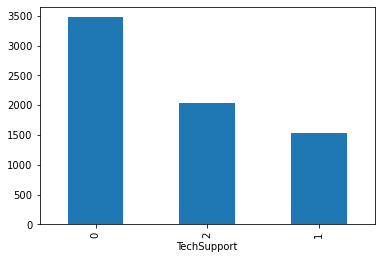

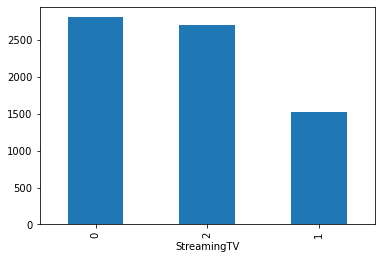

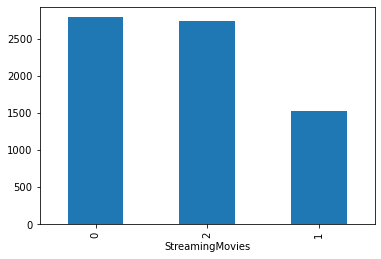

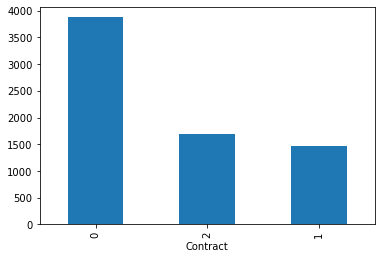

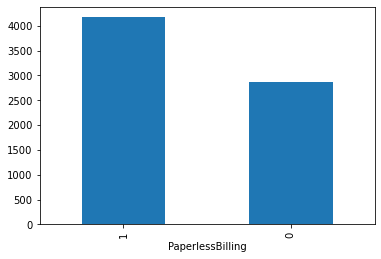

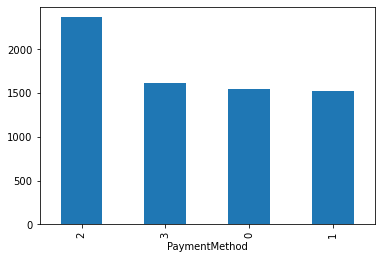

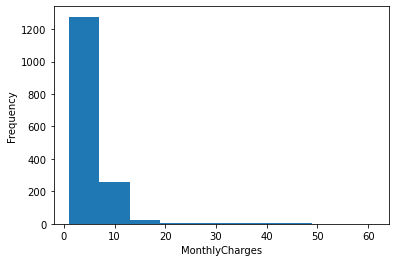

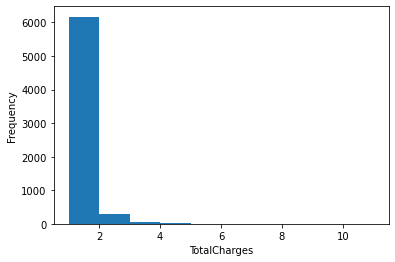

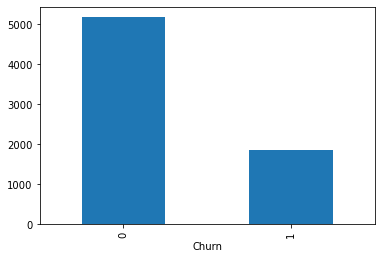

In [16]:
counter = 0
column_name=list(df.columns)
Data_Type=list(df.dtypes)
for i in range(len(df.columns)):
    if counter !=17 and counter !=18 and counter!=4: #because there are lot of values for column 4,17 and 18 it makes sense to plot histogram
            pd.value_counts(df.iloc[:, counter]).plot(kind="bar")
            plt.xlabel(column_name[counter])
            counter=counter+1
            plt.show();
    else :
            pd.value_counts(df.iloc[:, counter]).plot(kind="hist")
            plt.xlabel(column_name[counter])
            counter=counter+1
            plt.show();
                       
                  
    
    
              
                                
                               
    
                 

Tenure -Bimodal with peaks b/w ranges 0-10 and 70
Montly charges for most users are b/w 20-30 approximately and the second peak occurs at 80

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

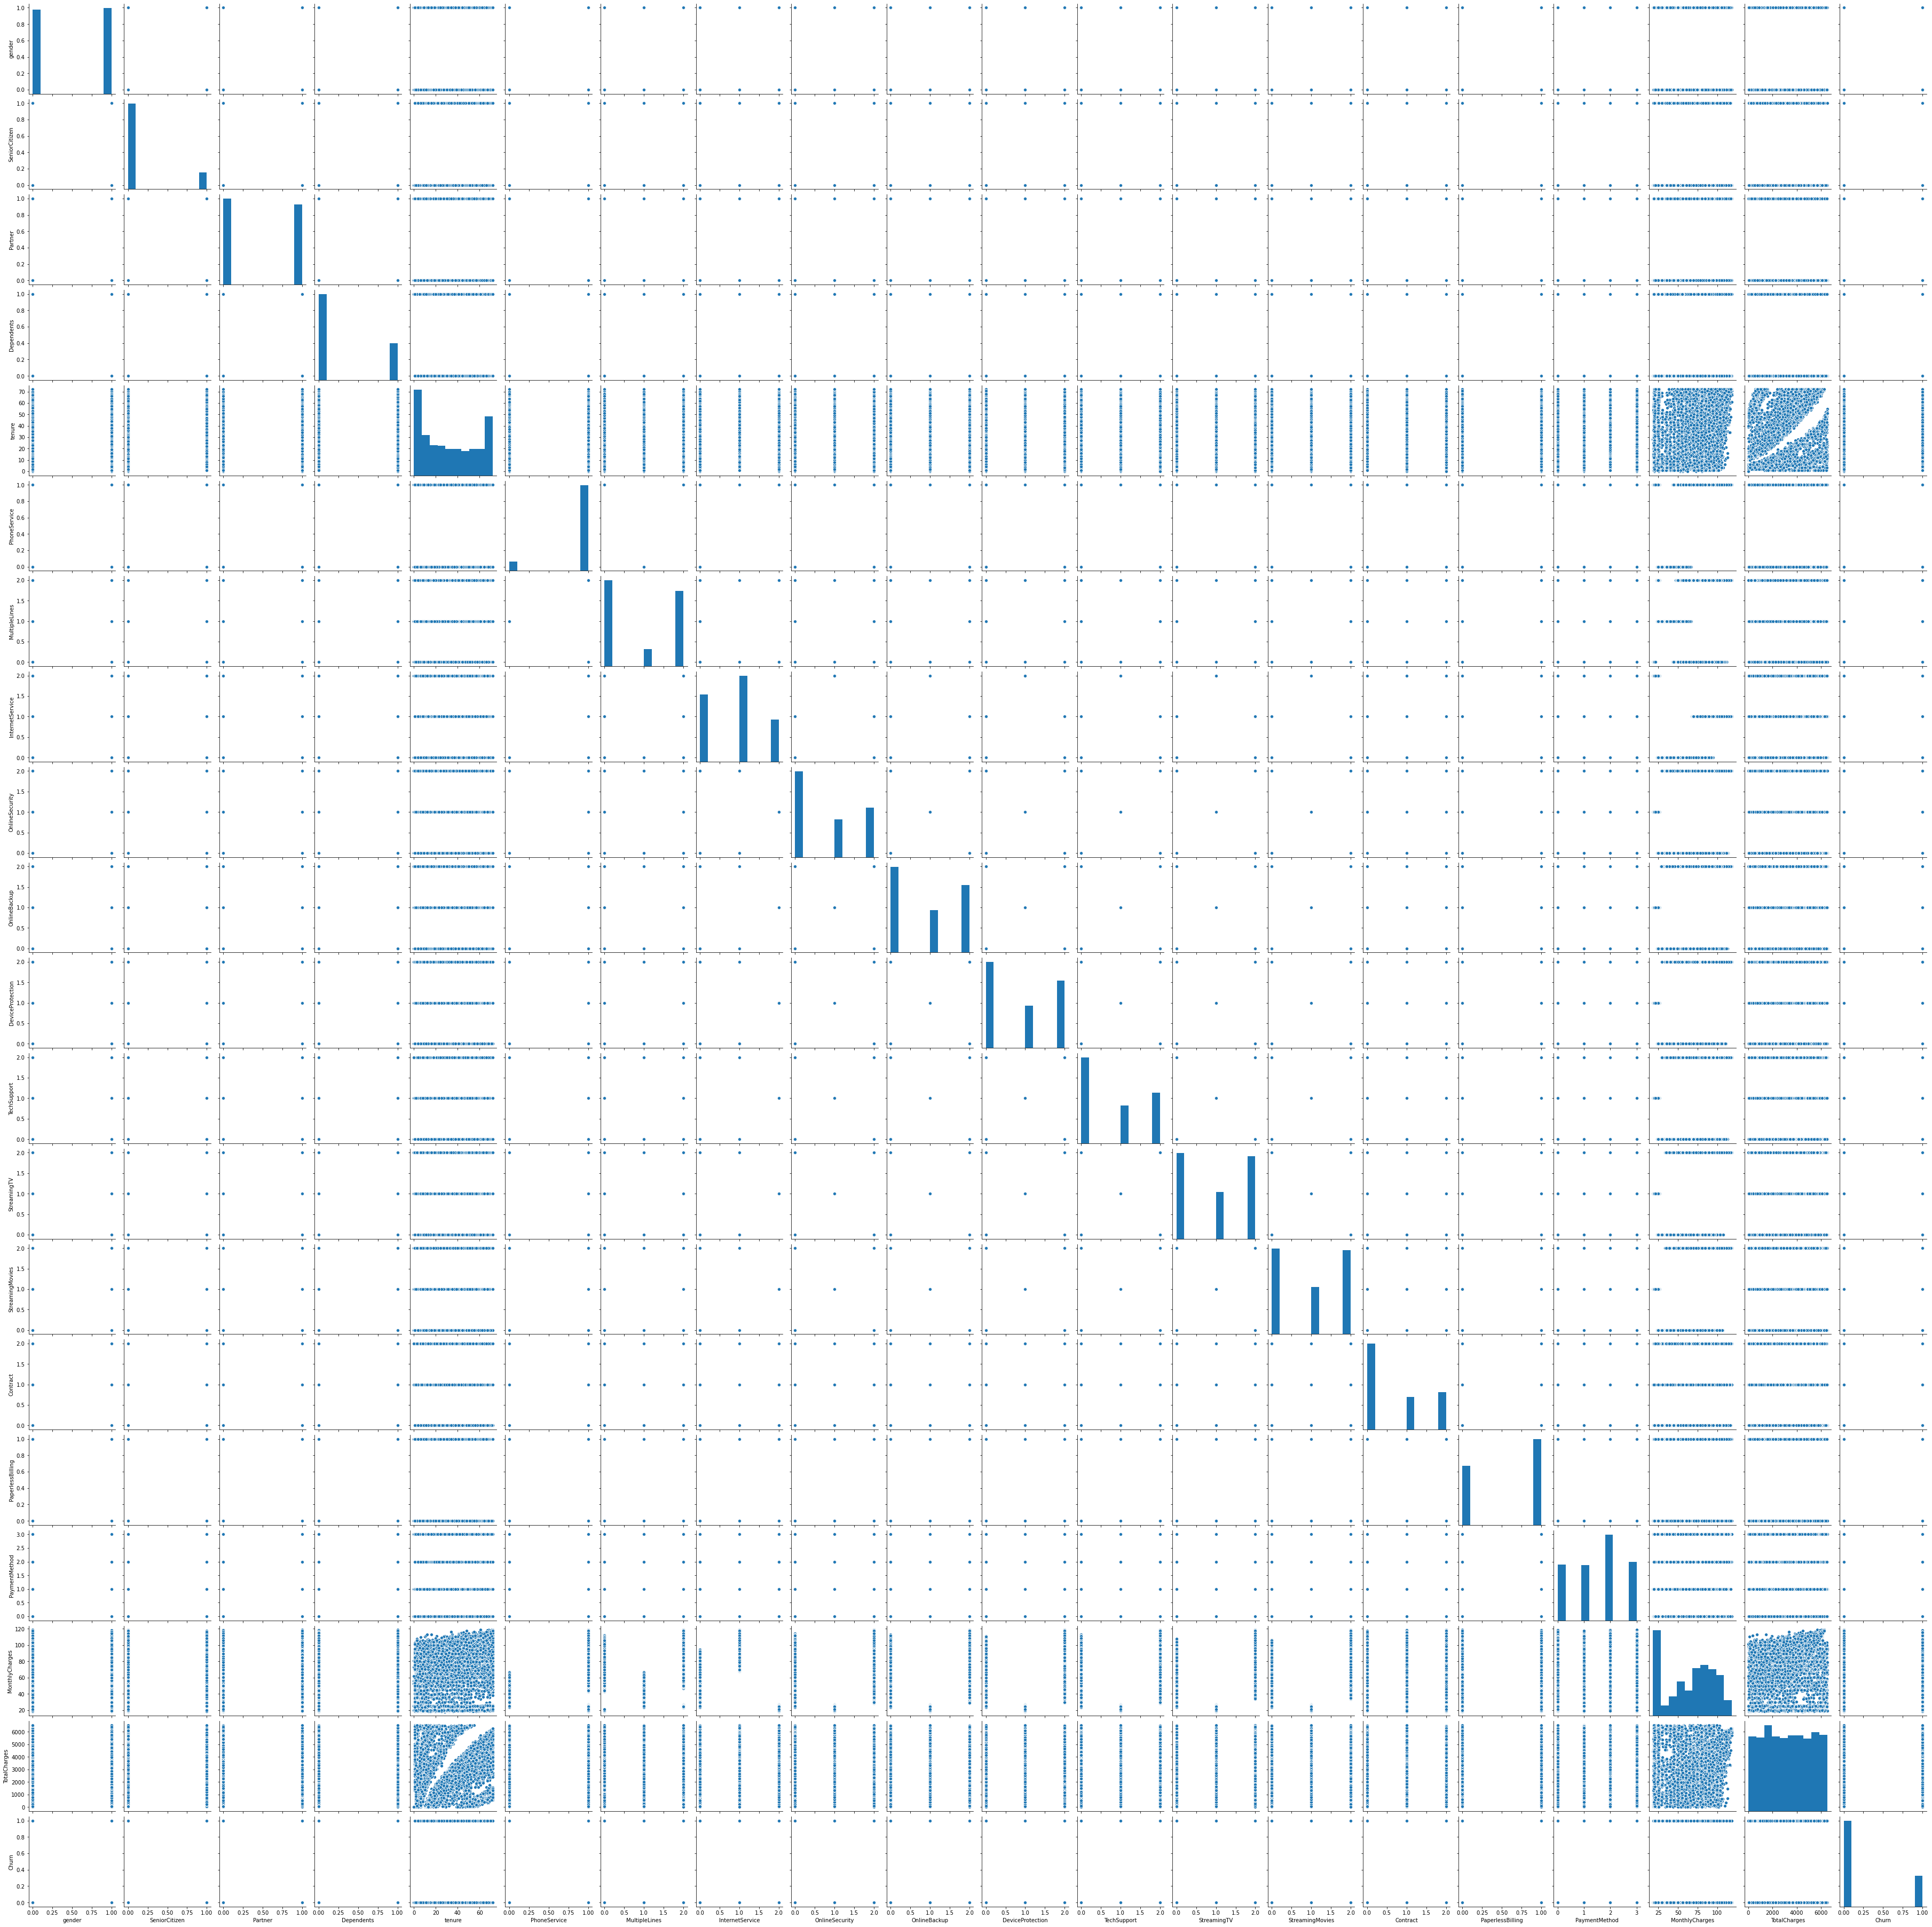

In [17]:
fig = plt.figure()
plt.figure(figsize=(20,20))
sns.pairplot(df)

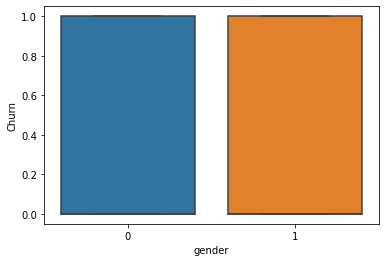

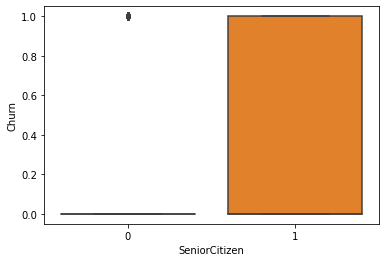

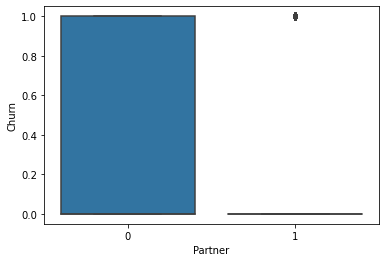

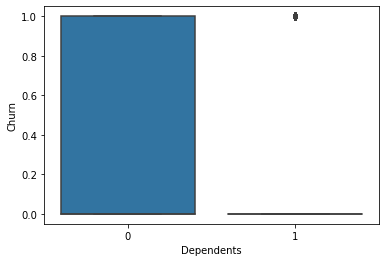

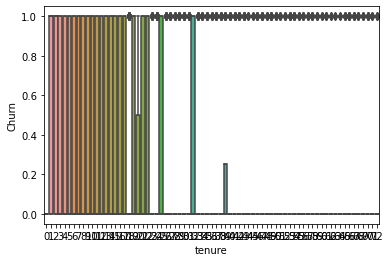

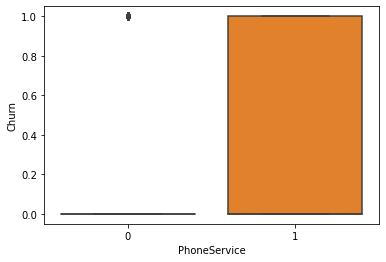

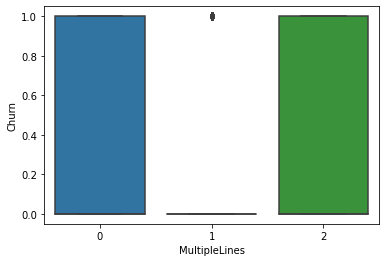

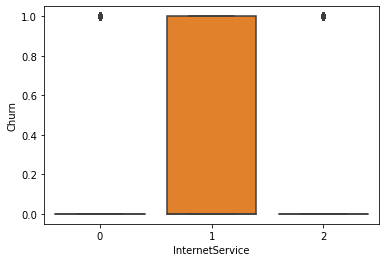

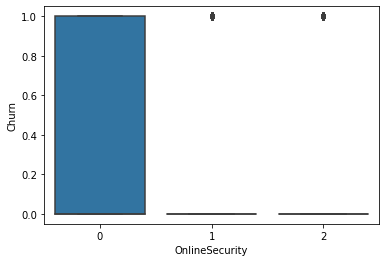

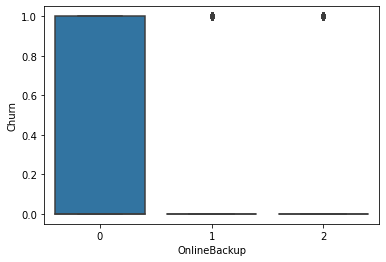

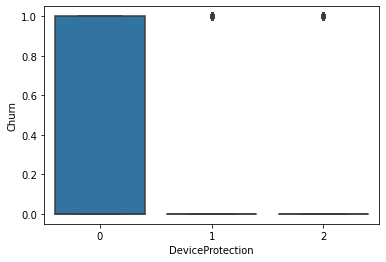

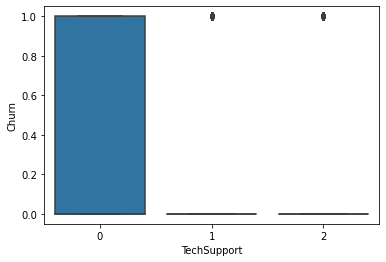

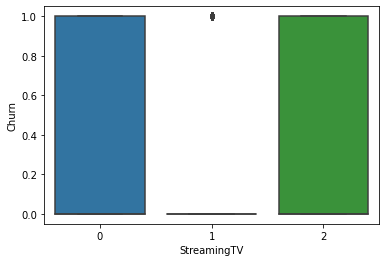

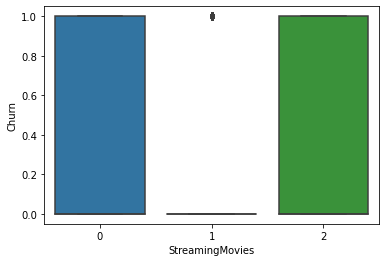

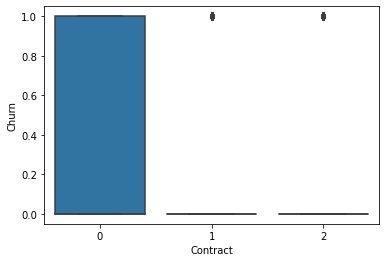

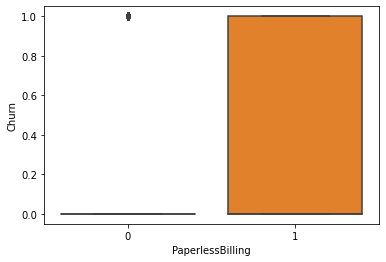

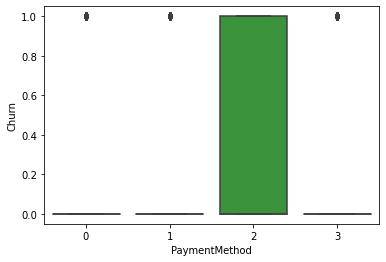

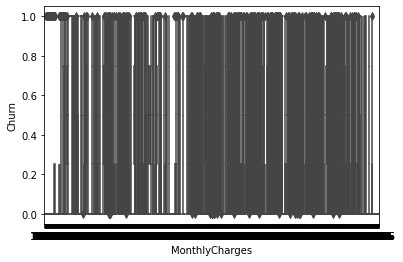

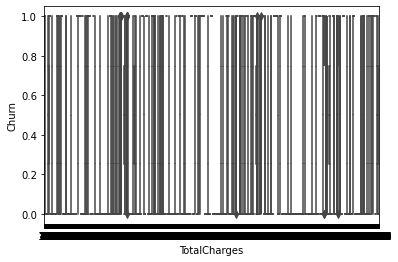

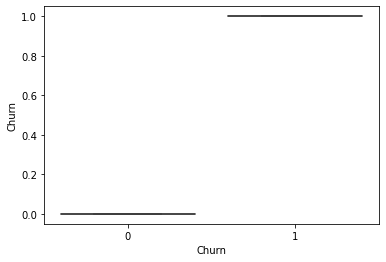

In [18]:
counter = 0
column_name=list(df.columns)
Data_Type=list(df.dtypes)
for i in range(len(df.columns)):
            sns.boxplot(x=df.iloc[:, counter], y=df['Churn'])
            plt.xlabel(column_name[counter])
            counter=counter+1
            plt.show();
       
            

                       


# 4.Data pre-processing:

In [19]:
#splitting  the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop("Churn", axis=1)
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print("Training-Predictor feature shape",X_train.shape)
print("Training-Predicted Class shape",y_train.shape)
print("Test-Predictor feature shape",X_test.shape)
print("Test-Predicted Class shape",y_test.shape)

Training-Predictor feature shape (4225, 19)
Training-Predicted Class shape (4225,)
Test-Predictor feature shape (2818, 19)
Test-Predicted Class shape (2818,)


In [21]:
n_true = len(df.loc[df['Churn'] == 1])
n_false = len(df.loc[df['Churn'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 1869 (26.54%)
Number of false cases: 5174 (73.46%)


In [22]:
n_train_true = len(y_train.loc[y_train == 1])
n_train_false = len(y_train.loc[y_train == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_train_true, (n_train_true / (n_train_true + n_train_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_train_false, (n_train_false / (n_train_true + n_train_false)) * 100))

Number of true cases: 1133 (26.82%)
Number of false cases: 3092 (73.18%)


In [23]:
n_test_true = len(y_test.loc[y_test == 1])
n_test_false = len(y_test.loc[y_test == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_test_true, (n_test_true / (n_test_true + n_test_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_test_false, (n_test_false / (n_test_true + n_test_false)) * 100))

Number of true cases: 736 (26.12%)
Number of false cases: 2082 (73.88%)


The no of true cases and false cases are same across the given training and testing data.HEnce, it is a good distribution

# 5. Model training, testing and tuning

In [24]:
#Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Function to caluclate Best score for Decision Tree

def Best_Model_Prediction_DecisionTreeClassifier(X_train, X_test, y_train, y_test ):
    max_test_score=0
    count=0
    jmax=0
    for i in range(1,15):
        for j in range(1,15):
            dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=j)
            dTreeR.fit(X_train, y_train)
            if dTreeR.score(X_test, y_test)> max_test_score:
                max_test_score=dTreeR.score(X_test, y_test)
                count=i
                jmax=j
                
    print("The max score for Decison Tree is "+" " +str(max_test_score) +" at n ="+" " +str(count)+ " "+"random state"+" " +str(jmax))    
    return max_test_score      
                
#Function to caluclate Best score for Bagging     
def Best_Model_Prediction_Bagging(X_train, X_test, y_train, y_test ):
    max_test_score=0
    count=0
    jmax=0
    for i in range(1,15):
        for j in range(1,15):
            dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
            bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=i,random_state=j)
            bgcl = bgcl.fit(X_train, y_train)
            y_predict = bgcl.predict(X_test)
            if bgcl.score(X_test, y_test)> max_test_score:
                max_test_score=bgcl.score(X_test , y_test)
                count=i
                jmax=j
                
    print("The max score for Bagging is "+" " +str(max_test_score) +" at n ="+" " +str(count)+ " "+"random state"+" " +str(jmax))    
    return max_test_score
            
#Function to caluclate Best score for GradientBoost     
def Best_Model_Prediction_GradientBoost(X_train, X_test, y_train, y_test ):
    max_test_score=0
    count=0
    jmax=0
    for i in range(1,15):
        for j in range(1,15):
            gbcl = GradientBoostingClassifier(n_estimators =i,random_state=j)
            gbcl = gbcl.fit(X_train, y_train)
            y_predict = gbcl.predict(X_test)
            if gbcl.score(X_test, y_test)> max_test_score:
                max_test_score=gbcl.score(X_test , y_test)
                count=i
                jmax=j
                
    print("The max score for Gradient Boost is "+" " +str(max_test_score) +" at n ="+" " +str(count)+ " "+"random state"+" " +str(jmax))    
    return max_test_score
            
#Function to caluclate Best score for Ensemble RandomForest Classifier     
def Best_Model_Prediction_Ensemble_RandomForest_Classifie(X_train, X_test, y_train, y_test ):
    count=0
    jmax=0
    featuremax=0
    max_test_score=0
    for i in range(1,50,5):
        for j in range(1,15):
            for k in range (1,12):
                rfcl = RandomForestClassifier(n_estimators = i, random_state=j,max_features=k)
                rfcl = rfcl.fit(X_train, y_train)
                y_predict = rfcl.predict(X_test)
                if rfcl.score(X_test, y_test)> max_test_score:
                    max_test_score=rfcl.score(X_test , y_test)
                    count=i
                    jmax=j
                    featuremax=k
            
        
            
    print("The max score for Ensemble Random Forest is "+" " +str(max_test_score) +" at n estimators"+" " +str(count)+ " "+"random state"+" " +str(jmax) + "max features "+str(featuremax))    
    return max_test_score
            

     

    

In [25]:
    def Best_Model_Prediction(X_train, X_test, y_train, y_test ):
            decision_tree_score= Best_Model_Prediction_DecisionTreeClassifier(X_train, X_test, y_train, y_test )
            bagging_tree_score= Best_Model_Prediction_Bagging(X_train, X_test, y_train, y_test )
            gradient_boost_score=Best_Model_Prediction_GradientBoost(X_train, X_test, y_train, y_test)
            ensemble_rf_score=Best_Model_Prediction_Ensemble_RandomForest_Classifie(X_train, X_test, y_train, y_test )
         
                    
                
                
            
         

In [26]:
Best_Model_Prediction(X_train, X_test, y_train, y_test )

The max score for Decison Tree is  0.7895670688431512 at n = 4 random state 1
The max score for Bagging is  0.7934705464868701 at n = 10 random state 1
The max score for Gradient Boost is  0.7952448545067423 at n = 14 random state 1
The max score for Ensemble Random Forest is  0.8026969481902059 at n estimators 36 random state 8max features 8


Conclusion:
1.More data is required and common column data is required to properly merge the data
2.The best model to be used according to me is decison tree as it has less estimators and computationally less expensive.
    
    